# Introduction :

WeRateDogs Twitter data to wrangling ,analyses ,visualizing And exploratary anaylsis .The data collected was from the Twitter account.People's rate dogs with a comment and Analysis done on the basis of ratings almost always have a denominator of 10 and image prediction,tweets ,retweets and favorite .

1.Data wrangling, which consists of:
-Gathering data .
-Assessing data.
-Cleaning data.
Storing, analyzing, and visualizing WeRateDogs wrangled data and finally combined data in master document to be used in data analysis and visualization.

2.Analysis is done on the basis of rating, tweets and retweet.

-Analyse the relationship between ratings, favourite counts and retweets_count.


In [1]:
import pandas as pd
import numpy  as np
import tweepy
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
from lxml import html 
import re
import matplotlib
import requests


In [2]:
from datetime import datetime
from bs4 import BeautifulSoup
%matplotlib inline
matplotlib.font_manager._rebuild()
sns.set(style="darkgrid",font_scale=1.5)

## Gather

### Twitter-Archive-enhanced Data.

In [3]:
df = pd.read_csv('twitter-archive-enhanced .csv')

### Image-predictions Data.


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
f = open('image-predictions.tsv', "w")
f.write(response.text)
f.close()

tsv_read = pd.read_csv('image-predictions.tsv' ,sep='\t')
tsv_read

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Programmatically download the json files from the Twitter Account .

In [5]:
# scraping tweets from twitter took a lot of time. The folling commented code was run once and scraped results were stored in a file for subsequent reads.

#consumer_key = '****'
#consumer_secret = '****'
#access_token = '****'
#access_secret = '****'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)
#api
#tweet_data = {}
#fails_dict = {}
#start = timer()
#for tweet_id in tweet_ids:
 #   try:
  #      tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
   #     tweet_data[str(tweet_id)] = tweet_status._json
    #    print(tweet_data[str(tweet_id)])
    #except tweepy.TweepError as e:
     #   print(e)
      #  print("Error for: " +str(tweet_id))
       # fails_dict[str(tweet_id)] = e

#end = timer()
#print(end - start)
#print(fails_dict)
#print("Length : %d"% len (fails_dict))
#with open('tweet_json.txt', 'w') as file:
#    json.dump(tweet_data, file)

In [6]:
tweet_ids = list(df.tweet_id)
tweet_df = pd.DataFrame(columns=['tweet_id', 'retweet_count','favorite_count'])

with open('tweet-json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        tweet_df = tweet_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                                       columns = ['tweet_id', 'retweet_count', 'favorite_count']))
tweet_df = tweet_df.reset_index(drop = True)

### Assessing Data:
- Assess the individual dataset performing the following method:
   .head(),.info(),.describe(),.nunique(),.isnull().
-Data wrangling first iteration :Datatype error,extract url from source    html tag,source,remove white space from text.
- Data wrangling second iteration deals with :Missing value,Datatype       issue,used melt method and merge used to combine the dataframes that     contained information about the tweets ,retweets,favorite_counts.


# Dataset 1: Twitter-Archive-enhanced Data

In [7]:
df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Observations

1. in_reply_to_status_id only 78 non null values.

2. in_reply_to_user_id data only 78 non null values.

3. timestamp data type is in string format .

4. retweeted_status_id  only 181 non null values.

5. retweeted_status_user_id only 181 id retweeted

6. retweeted_status_timestamp datatype is in string format .

7. expanded_urls data missing.total url: 2297 non null values

8. source field contains url inside html statement

In [10]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

* 2356 tweets
* 957 different dogs referenced
* 4 different sources


In [13]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## Data wrangling first iteration :

    *timestamp data type is in string format .

    *Datatype error

    *extract url from source html tag

**Define :

   Timestamp data type is in string format convert timestamp data into datetime64
     

**Code 

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

**Define:

  retweeted_status_timestamp datatype is in string format convert retweeted_status_timestamp datatype into datetime64.


In [15]:
df['retweeted_status_timestamp'] = pd.to_datetime(df['retweeted_status_timestamp'])
df['retweeted_status_timestamp'].dtype

datetime64[ns, UTC]

**Test

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Define

Source show ahref (ahref="http://twitter.com/download/iphone" r.._) Remove unnecessary tags from source column.


**Code

In [17]:
def getUrl(htmlString):
    return re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', htmlString)[0]

**Test

In [18]:
df['source'] = df['source'].apply(getUrl)
df.head(4)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


**find the total data source types 

In [19]:
df['source'].value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

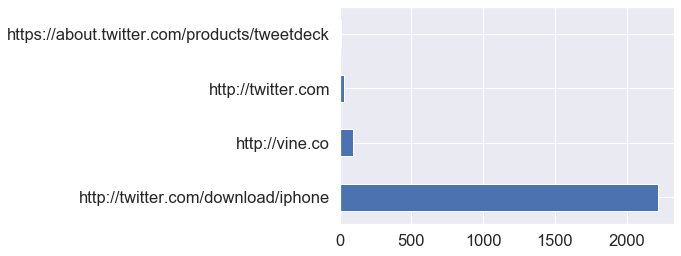

In [20]:
df.source.value_counts().plot(kind='barh');

* mostly everyone used twitter mobile app for posting dog tweets

**Define: 

Remove White space from tweets

**code:

In [21]:
df['text'] = df['text'].replace('\s+', ' ', regex=True)

**Test:

In [22]:
df['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

**Define:

- Invalid names  

**Code:

In [23]:
names= df['name'].str.contains('^[a-z]', regex = True)


***Test:

In [24]:
df[names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

Extracted dog name contain invalid name such as :a,an ,the,very, etc. Such dog tweets may be dropped as such but I chose to keep the tweets. Whats in the name.


# Dataset 2: Wrangling Image Predictions Data

In [25]:
tsv_read.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
tsv_read.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


## Observations: Tweet image predictions columns:

1. tweet_id: the unique identifier for each tweet

2. jpg_url: dog's image URL

3. img_num: the image number that corresponded to the most confident prediction.

4. p1 is the algorithm's #1 prediction for the image in the tweet 


5. p1_conf: how confident the algorithm is in its #1 prediction

6. p2 is the algorithm's second most likely prediction 

7. p2_conf: how confident the algorithm is in its #2 prediction

8. p3 is the algorithm's second most likely prediction 

9. p3_conf: how confident the algorithm is in its #3 prediction

In [27]:
tsv_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* Total tweet_id for image prediction :2075  and analysis  of twitter archived data is 2356 so, there is missing image data.

In [28]:
tsv_read.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
tsv_read.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
tsv_read['jpg_url'] = tsv_read['jpg_url'].apply(getUrl)
tsv_read

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Programmatically download the json files from the Twitter Account .

 - Query the Twitter API for each tweet's JSON data using Python's Tweepy library 
 -Store each tweet's entire set of JSON data in a file called tweet_json.txt file.
 -Each tweet's JSON data should be written and Then read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count,and favorite count.

# Dataset 3: Twitter tweets data

#### Read text file line by line into a data frame

In [31]:
tweet_df.sample(10)

,tweet_id,retweet_count,favorite_count
133,866686824827068416,3727,20070
559,802952499103731712,2336,10085
201,853639147608842240,11265,37198
1034,744971049620602880,3042,8652
1660,682962037429899265,15043,26239
1139,727644517743104000,1962,6431
846,766069199026450432,1003,4765
16,888917238123831296,4709,29611
2019,672082170312290304,402,1003
496,813142292504645637,2728,9361


## Observations

 - Coloumns present in the dataset : created_at, id, , id_str, full_text, truncated, display_text_range, entities, extended_entities, source, in_reply_to_status_id, in_reply_to_status_id_str',in_reply_to_user_id, in_reply_to_user_id_str,in_reply_to_screen_name, geo, coordinates,place, contributors, is_quote_status, retweet_count,favorite_count,favorited,retweeted, possibly_sensitive, possibly_sensitive_appealable, lang

     *All the fields are self explainotry. 

Here we consider on retweet and favorite counts for wrangling and analysis as per the problem statement.

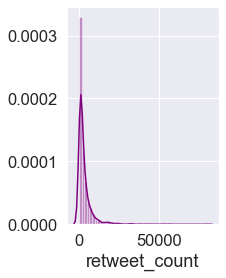

In [32]:
plt.figure(1)
plt.subplot(121)
sns.distplot(tweet_df['retweet_count'], color = 'purple')
plt.show()

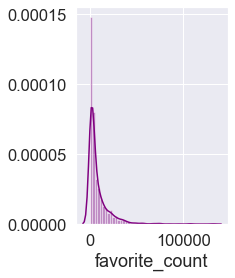

In [33]:
plt.figure(1)
plt.subplot(121)
sns.distplot(tweet_df['favorite_count'], color = 'purple')
plt.show()

In [34]:
len(tweet_df.index)

2354

**Define String Value datatype tweet_id,retweet_count,favorite_count convert into int64

In [35]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


**Code

In [36]:
tweet_df['tweet_id'] = tweet_df['tweet_id'].astype('int64')
tweet_df['retweet_count'] = tweet_df['retweet_count'].astype('int64')
tweet_df['favorite_count'] = tweet_df['favorite_count'].astype('int64')

**Test

In [39]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [40]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [41]:
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [42]:
all_columns = pd.Series(list(df) + list(tsv_read) + list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

# Data wrangling second iteration


### Cleaning Issues:
* Low quality data has content issues.

* Untidy data has structural issues


In [43]:
df_clean = df.copy()
tsv_read_clean = tsv_read.copy()
tweet_df_clean = tweet_df.copy()

In [44]:
df_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Detect missing values

In [45]:
df_clean.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [46]:
df_clean['in_reply_to_status_id']=df_clean['in_reply_to_status_id'].fillna(0)
df_clean['in_reply_to_user_id']=df_clean['in_reply_to_user_id'].fillna(0)


In [47]:
df_clean['retweeted_status_id']=df_clean['retweeted_status_id'].fillna(0)
df_clean['retweeted_status_user_id']=df_clean['retweeted_status_user_id'].fillna(0)

In [48]:
df_clean['retweeted_status_timestamp']=df_clean['retweeted_status_timestamp'].fillna(0)
df_clean['expanded_urls']=df_clean['expanded_urls'].fillna(0)


**Test:

In [49]:
df_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,0.0,0.0,2017-07-29 00:08:17+00:00,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,0.0,0.0,0,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,0.0,0.0,2017-07-28 16:27:12+00:00,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,0.0,0.0,0,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,0.0,0.0,2017-07-28 00:22:40+00:00,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,0.0,0.0,0,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,0.0,0.0,2017-07-27 16:25:51+00:00,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,0.0,0.0,0,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,0.0,0.0,2017-07-26 15:59:51+00:00,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,0.0,0.0,0,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Fix Datatype issue:

**Define :

Convert in_reply_to_status_id and in_reply_to_user_id to data type integer.

**Code:

In [50]:
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].astype('int64')

In [51]:
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].astype('int64')

**Test

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   int64              
 2   in_reply_to_user_id         2356 non-null   int64              
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   float64            
 7   retweeted_status_user_id    2356 non-null   float64            
 8   retweeted_status_timestamp  2356 non-null   object             
 9   expanded_urls               2356 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [53]:
df_clean[df_clean.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [54]:
df_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

    *Looking at the data set we can see there are random data names in the tweet data base.  Which can be manually removed. But I have chosen to keep the tweets as we just need the retweet and favorite count from the tweet. Name of the dogs dosent matter.

In [55]:
df_clean['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [56]:
sum(df_clean.rating_numerator >= 15)

28

28 tweets with numerator >= 15.

In [57]:
df_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [58]:
df_clean[df_clean['rating_denominator'] <= 0]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,835245984028504064,26259576,2017-02-24 21:54:03+00:00,http://twitter.com/download/iphone,@jonnysun @Lin_Manuel ok jomny I know you're e...,0.0,0.0,0,0,960,0,None,None,None,None,None


In [59]:
df_clean[df_clean['rating_denominator'] == 10].count()


tweet_id                      2333
in_reply_to_status_id         2333
in_reply_to_user_id           2333
timestamp                     2333
source                        2333
text                          2333
retweeted_status_id           2333
retweeted_status_user_id      2333
retweeted_status_timestamp    2333
expanded_urls                 2333
rating_numerator              2333
rating_denominator            2333
name                          2333
doggo                         2333
floofer                       2333
pupper                        2333
puppo                         2333
dtype: int64

#### Content issues:
- 745 counts with the dog name as "None".
-  55 counts with the dog name as "a"

In [60]:
df_clean['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Suki         1
Asher        1
Doobert      1
Gunner       1
Jo           1
Name: name, Length: 957, dtype: int64

In [61]:
df_clean['name'].nunique()


957

In [62]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,0,0,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,0.0,0.0,0,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,0,0,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,0.0,0.0,0,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,0,0,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,0.0,0.0,0,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,0,0,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,0.0,0.0,0,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Melt (Combine) the four dog stages 'doggo', 'floofer', 'pupper', and 'puppo' into one column dog_stage

In [63]:
melt1 = df_clean[['tweet_id','rating_numerator','rating_denominator','name', 'doggo', 'floofer', 'pupper','puppo']].copy()

In [64]:
melt1=melt1.melt(id_vars=['tweet_id','rating_numerator','rating_denominator','name'],value_name='dog_stage')
melt1= melt1.drop('variable', axis=1)
melt1.head(2)

,tweet_id,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,13,10,Phineas,None
1,892177421306343426,13,10,Tilly,None


In [65]:
melt1[(melt1.dog_stage =='puppo')]

,tweet_id,rating_numerator,rating_denominator,name,dog_stage
7080,889665388333682689,13,10,None,puppo
7082,889531135344209921,13,10,Stuart,puppo
7139,878776093423087618,13,10,Snoopy,puppo
7162,874012996292530176,13,10,Sebastian,puppo
7197,867421006826221569,12,10,Shikha,puppo
7236,859607811541651456,13,10,None,puppo
7259,855851453814013952,13,10,None,puppo
7463,825535076884762624,14,10,None,puppo
7465,825120256414846976,12,10,Pablo,puppo
7466,825026590719483904,12,10,Pablo,puppo


In [66]:
melt1[melt1['dog_stage'].astype(str).ne('None')].dropna()
melt1.head(2)

,tweet_id,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,13,10,Phineas,None
1,892177421306343426,13,10,Tilly,None


In [67]:
melt1['rating'] = melt1.rating_numerator/df.rating_denominator
melt1['rating'].head(2)

0    1.3
1    1.3
Name: rating, dtype: float64

In [68]:
dogTypes = melt1['dog_stage']
dogTypes
melt1[melt1['dog_stage']=="doggo"]

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating
9,890240255349198849,14,10,Cassie,doggo,1.4
43,884162670584377345,12,10,Yogi,doggo,1.2
99,872967104147763200,12,10,None,doggo,1.2
108,871515927908634625,12,10,Napolean,doggo,1.2
110,871102520638267392,14,10,None,doggo,1.4
...,...,...,...,...,...,...
1117,732375214819057664,11,10,Kyle,doggo,1.1
1141,727644517743104000,13,10,None,doggo,1.3
1156,724771698126512129,11,10,None,doggo,1.1
1176,719991154352222208,10,10,None,doggo,1.0


In [69]:
#Not used as a dog can belog to multiple stages
def setNone(dog_stage):
    if dog_stage == "0":
      return "None"
    else:
      return dog_stage

melt1['dog_stage'] = melt1.apply(lambda row: setNone(row['dog_stage']), axis=1)

ra_filtered = melt1[melt1['name'] != 'None']
rt =ra_filtered.sort_values(by=['rating'], ascending=False).drop_duplicates('name',keep='first')
rt

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating
979,749981277374128128,1776,10,Atticus,None,177.600000
695,786709082849828864,75,10,Logan,None,7.500000
516,810984652412424192,24,7,Sam,None,3.428571
763,778027034220126208,27,10,Sophie,None,2.700000
449,819004803107983360,14,10,Bo,doggo,1.400000
...,...,...,...,...,...,...
2136,670055038660800512,3,10,Tommy,None,0.300000
1406,699088579889332224,3,10,Charl,None,0.300000
1692,681302363064414209,3,10,Chuck,None,0.300000
2246,667878741721415682,2,10,Tedrick,None,0.200000


#### Visualization Analysis: 
- Anaysis on basis of dog_stage ,name and their rating.

C:\Users\cody\Anaconda2\envs\mypython3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


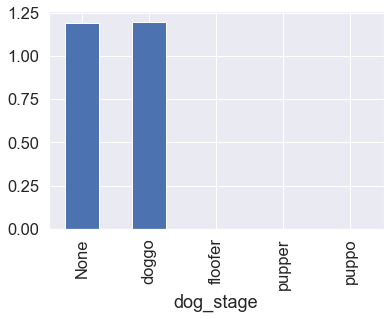

In [70]:
ra_filtered[(ra_filtered.dog_stage!='None') & ra_filtered.dog_stage!='None'].groupby('dog_stage')['rating'].mean().plot.bar()

In [71]:
ra_filtered[(ra_filtered.dog_stage =='puppo')]

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating
7082,889531135344209921,13,10,Stuart,puppo,NaN
7139,878776093423087618,13,10,Snoopy,puppo,NaN
7162,874012996292530176,13,10,Sebastian,puppo,NaN
7197,867421006826221569,12,10,Shikha,puppo,NaN
7465,825120256414846976,12,10,Pablo,puppo,NaN
7466,825026590719483904,12,10,Pablo,puppo,NaN
7506,820013781606658049,13,10,Oliver,puppo,NaN
7507,819952236453363712,13,10,Oliver,puppo,NaN
7537,816829038950027264,12,10,Betty,puppo,NaN
7614,805823200554876929,12,10,Reginald,puppo,NaN


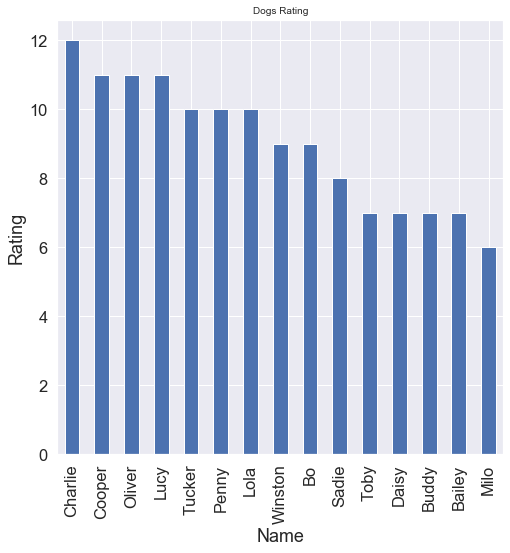

In [72]:
fig = plt.figure(figsize=(8,8))

melt1Copy = melt1.copy();
melt1Copy.drop(melt1Copy[melt1Copy['name'] == 'None'].index, inplace = True) 
melt1Copy[melt1Copy['name'].str.contains('^[A-Z]', regex = True)].groupby('name').count()['rating'].sort_values(ascending=False).nlargest(15).plot(kind='bar');

plt.title("Dogs Rating",fontsize=10)
plt.xlabel("Name")
plt.ylabel("Rating");

- Most of dogs found in stages of doggo and name called by a and maximun number of dog have called by undefined named like none in the dataset.

In [73]:
len(melt1.name.unique())

957

In [74]:
melt1[melt1.name != 'None'].name.value_counts().head(10)

a          220
Charlie     48
Oliver      44
Cooper      44
Lucy        44
Lola        40
Penny       40
Tucker      40
Winston     36
Bo          36
Name: name, dtype: int64

In [75]:
melt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            9424 non-null   int64  
 1   rating_numerator    9424 non-null   int64  
 2   rating_denominator  9424 non-null   int64  
 3   name                9424 non-null   object 
 4   dog_stage           9424 non-null   object 
 5   rating              2356 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 441.9+ KB


In [76]:
df_clean.to_csv('df_clean.csv')

In [77]:
tsv_read_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [78]:
tsv_read_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [79]:
tsv_read_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [80]:
melt2=tsv_read_clean.melt(id_vars=['tweet_id','p1_conf','p2_conf','p3_conf','jpg_url','p1','p2','p3'],value_name='p_dog')
melt2= melt2.drop('variable', axis=1)
melt2

,tweet_id,p1_conf,p2_conf,p3_conf,jpg_url,p1,p2,p3,p_dog
0,666020888022790149,0.465074,0.156665,0.061428,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog,1
1,666029285002620928,0.506826,0.074192,0.072010,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,Rhodesian_ridgeback,1
2,666033412701032449,0.596461,0.138584,0.116197,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,malinois,bloodhound,1
3,666044226329800704,0.408143,0.360687,0.222752,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,redbone,miniature_pinscher,1
4,666049248165822465,0.560311,0.243682,0.154629,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,Rottweiler,Doberman,1
...,...,...,...,...,...,...,...,...,...
8295,891327558926688256,0.555712,0.225770,0.175219,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,English_springer,German_short-haired_pointer,True
8296,891689557279858688,0.170278,0.168086,0.040836,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,Labrador_retriever,spatula,False
8297,891815181378084864,0.716012,0.078253,0.031379,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,malamute,kelpie,True
8298,892177421306343426,0.323581,0.090647,0.068957,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon,True


In [81]:
tsv_read_clean.to_csv('tsv_read_clean.csv')

***Merge Two Data frame:melt1 and melt2

In [82]:
merge_data= pd.merge(melt1,melt2,
                        how = 'inner', on = 'tweet_id')
merge_data.head()
merge_data[merge_data['dog_stage']=="doggo"]

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating,p1_conf,p2_conf,p3_conf,jpg_url,p1,p2,p3,p_dog
144,890240255349198849,14,10,Cassie,doggo,1.4,0.511319,0.451038,0.029248,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,Cardigan,Chihuahua,1
145,890240255349198849,14,10,Cassie,doggo,1.4,0.511319,0.451038,0.029248,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,Cardigan,Chihuahua,True
146,890240255349198849,14,10,Cassie,doggo,1.4,0.511319,0.451038,0.029248,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,Cardigan,Chihuahua,True
147,890240255349198849,14,10,Cassie,doggo,1.4,0.511319,0.451038,0.029248,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,Cardigan,Chihuahua,True
624,884162670584377345,12,10,Yogi,doggo,1.2,0.707046,0.199396,0.049148,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,malinois,Norwegian_elkhound,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15683,719991154352222208,10,10,None,doggo,1.0,0.605304,0.130948,0.094692,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,golden_retriever,cocker_spaniel,Labrador_retriever,True
16080,716080869887381504,11,10,None,doggo,1.1,0.638625,0.254717,0.071732,https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg,golden_retriever,chow,Tibetan_mastiff,1
16081,716080869887381504,11,10,None,doggo,1.1,0.638625,0.254717,0.071732,https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg,golden_retriever,chow,Tibetan_mastiff,True
16082,716080869887381504,11,10,None,doggo,1.1,0.638625,0.254717,0.071732,https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg,golden_retriever,chow,Tibetan_mastiff,True


***Drop_duplicates from merge_data:

In [83]:

merge_data.drop_duplicates()


,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating,p1_conf,p2_conf,p3_conf,jpg_url,p1,p2,p3,p_dog
0,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.076110,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,1
1,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.076110,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,False
4,892420643555336193,13,10,Phineas,None,NaN,0.097049,0.085851,0.076110,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,1
5,892420643555336193,13,10,Phineas,None,NaN,0.097049,0.085851,0.076110,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,False
16,892177421306343426,13,10,Tilly,None,1.3,0.323581,0.090647,0.068957,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33156,666033412701032449,9,10,a,None,NaN,0.596461,0.138584,0.116197,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,malinois,bloodhound,1
33168,666029285002620928,7,10,a,None,0.7,0.506826,0.074192,0.072010,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,Rhodesian_ridgeback,1
33172,666029285002620928,7,10,a,None,NaN,0.506826,0.074192,0.072010,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,Rhodesian_ridgeback,1
33184,666020888022790149,8,10,None,None,0.8,0.465074,0.156665,0.061428,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog,1


Tidiness Issues:
-Analysis of retweet and favorite counts


In [84]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [85]:
tweet_df_clean.drop_duplicates(inplace=True)
print(tweet_df_clean)

                tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]


In [86]:
tweet_df_clean.retweet_count.dropna()

0       8853
1       6514
2       4328
3       8964
4       9774
        ... 
2349      41
2350     147
2351      47
2352      48
2353     532
Name: retweet_count, Length: 2354, dtype: int64

In [87]:
tweet_df_clean.favorite_count.dropna()

0       39467
1       33819
2       25461
3       42908
4       41048
        ...  
2349      111
2350      311
2351      128
2352      132
2353     2535
Name: favorite_count, Length: 2354, dtype: int64

In [88]:
tweet_df_clean[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


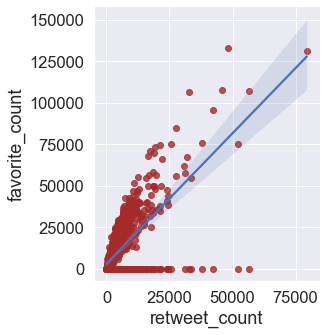

In [89]:
g = sns.lmplot("retweet_count", "favorite_count",tweet_df_clean,
              scatter_kws = {'marker':'o','color':'brown'})

We can see strong corelation between favorite count and retweet count

***Define:

***Tidiness issues:
Merge two dataframe merge_data,tweet_df_clean that contain information about rating and tweets .

***Code:

In [90]:
merge_data1= pd.merge(merge_data,tweet_df_clean,
                         how = 'inner', on = 'tweet_id')


***Test:

In [91]:

merge_data1.head(5)

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating,p1_conf,p2_conf,p3_conf,jpg_url,p1,p2,p3,p_dog,retweet_count,favorite_count
0,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.07611,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,1,8853,39467
1,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.07611,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,False,8853,39467
2,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.07611,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,False,8853,39467
3,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.07611,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,False,8853,39467
4,892420643555336193,13,10,Phineas,None,NaN,0.097049,0.085851,0.07611,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,1,8853,39467


***Define:

Detect missing value Nan issue can fixed using fillna(0)

***Code:

In [92]:
merge_data1['rating'].fillna(0,inplace= True)

In [93]:
merge_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33168 entries, 0 to 33167
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            33168 non-null  int64  
 1   rating_numerator    33168 non-null  int64  
 2   rating_denominator  33168 non-null  int64  
 3   name                33168 non-null  object 
 4   dog_stage           33168 non-null  object 
 5   rating              33168 non-null  float64
 6   p1_conf             33168 non-null  float64
 7   p2_conf             33168 non-null  float64
 8   p3_conf             33168 non-null  float64
 9   jpg_url             33168 non-null  object 
 10  p1                  33168 non-null  object 
 11  p2                  33168 non-null  object 
 12  p3                  33168 non-null  object 
 13  p_dog               33168 non-null  object 
 14  retweet_count       33168 non-null  int64  
 15  favorite_count      33168 non-null  int64  
dtypes: f

***Define:
Drop duplicates( tweet_id   

***Code and ***Test

In [94]:
merge_data1.mask(merge_data1.astype(object).eq('None')).dropna()

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating,p1_conf,p2_conf,p3_conf,jpg_url,p1,p2,p3,p_dog,retweet_count,favorite_count
144,890240255349198849,14,10,Cassie,doggo,1.4,0.511319,0.451038,0.029248,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,Cardigan,Chihuahua,1,7711,32467
145,890240255349198849,14,10,Cassie,doggo,1.4,0.511319,0.451038,0.029248,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,Cardigan,Chihuahua,True,7711,32467
146,890240255349198849,14,10,Cassie,doggo,1.4,0.511319,0.451038,0.029248,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,Cardigan,Chihuahua,True,7711,32467
147,890240255349198849,14,10,Cassie,doggo,1.4,0.511319,0.451038,0.029248,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,Cardigan,Chihuahua,True,7711,32467
236,889531135344209921,13,10,Stuart,puppo,0.0,0.953442,0.013834,0.007958,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,Labrador_retriever,redbone,1,2321,15359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27803,672205392827572224,9,10,Opal,pupper,0.0,0.952613,0.035376,0.003267,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,carton,crate,pug,True,1270,2414
27832,672160042234327040,8,10,Bubba,pupper,0.0,0.561027,0.222114,0.065456,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,pug,French_bulldog,Labrador_retriever,1,395,918
27833,672160042234327040,8,10,Bubba,pupper,0.0,0.561027,0.222114,0.065456,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,pug,French_bulldog,Labrador_retriever,True,395,918
27834,672160042234327040,8,10,Bubba,pupper,0.0,0.561027,0.222114,0.065456,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,pug,French_bulldog,Labrador_retriever,True,395,918


Check if Retweets and Favorites are corelated

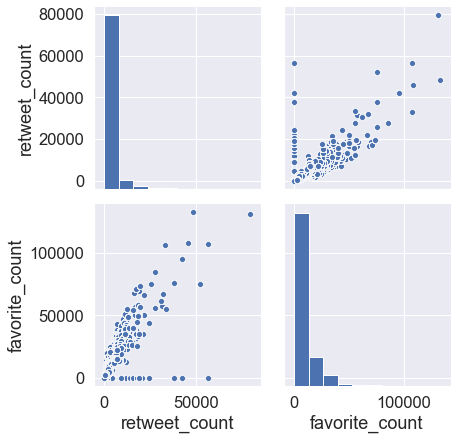

In [95]:
g = sns.pairplot(merge_data1, height=3,
                 vars=["retweet_count", "favorite_count"])

In [96]:
merge_data1['p1_conf'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0.097049
1        0.097049
2        0.097049
3        0.097049
4        0.097049
           ...   
33163    0.465074
33164    0.465074
33165    0.465074
33166    0.465074
33167    0.465074
Name: p1_conf, Length: 33168, dtype: float64>

No handles with labels found to put in legend.


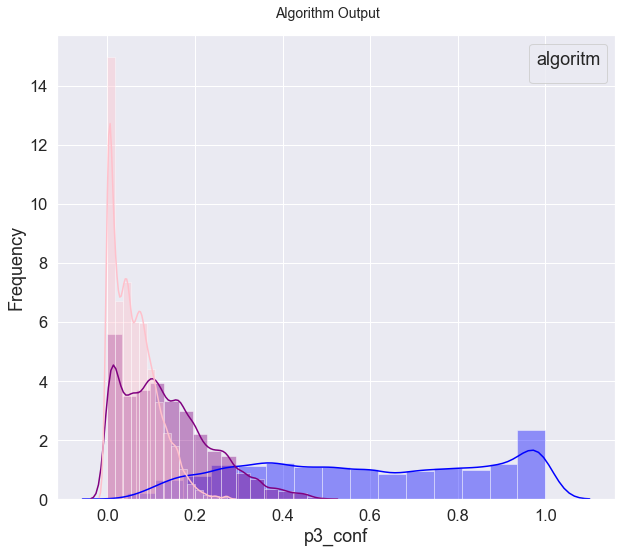

In [97]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("Algorithm Output", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)

ax.set_xlabel("Dog Classification Algorithm")

ax.set_ylabel("Frequency") 

g = sns.FacetGrid(data=merge_data1)

g.map(sns.distplot,'p1_conf' ,color='blue',
      kde=True, bins=15, ax=ax)

g.map(sns.distplot,'p2_conf', color='purple',
      kde=True, bins=15, ax=ax)

g.map(sns.distplot,'p3_conf', color='pink',
      kde=True, bins=15, ax=ax)

ax.legend(title='algoritm')
plt.close(2)

### DataWrangling(iteration 3)
- Reduce the result into one table for further Expolratory Analysis.

In [98]:
from functools import reduce
base=merge_data1[['tweet_id','favorite_count','retweet_count']]
feature=[base]+[melt1,melt2]
abt=reduce(lambda left,right: pd.merge(left,right,on=['tweet_id']),[melt1,melt2])
abt.tail(5)


,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating,p1_conf,p2_conf,p3_conf,jpg_url,p1,p2,p3,p_dog
33195,666020888022790149,8,10,None,None,NaN,0.465074,0.156665,0.061428,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog,True
33196,666020888022790149,8,10,None,None,NaN,0.465074,0.156665,0.061428,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog,1
33197,666020888022790149,8,10,None,None,NaN,0.465074,0.156665,0.061428,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog,True
33198,666020888022790149,8,10,None,None,NaN,0.465074,0.156665,0.061428,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog,True
33199,666020888022790149,8,10,None,None,NaN,0.465074,0.156665,0.061428,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog,True


In [99]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33200 entries, 0 to 33199
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            33200 non-null  int64  
 1   rating_numerator    33200 non-null  int64  
 2   rating_denominator  33200 non-null  int64  
 3   name                33200 non-null  object 
 4   dog_stage           33200 non-null  object 
 5   rating              8300 non-null   float64
 6   p1_conf             33200 non-null  float64
 7   p2_conf             33200 non-null  float64
 8   p3_conf             33200 non-null  float64
 9   jpg_url             33200 non-null  object 
 10  p1                  33200 non-null  object 
 11  p2                  33200 non-null  object 
 12  p3                  33200 non-null  object 
 13  p_dog               33200 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 3.8+ MB


In [100]:
abt.isnull().sum()

tweet_id                  0
rating_numerator          0
rating_denominator        0
name                      0
dog_stage                 0
rating                24900
p1_conf                   0
p2_conf                   0
p3_conf                   0
jpg_url                   0
p1                        0
p2                        0
p3                        0
p_dog                     0
dtype: int64

In [101]:
abt.drop_duplicates()

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating,p1_conf,p2_conf,p3_conf,jpg_url,p1,p2,p3,p_dog
0,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.076110,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,1
1,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.076110,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,False
4,892420643555336193,13,10,Phineas,None,NaN,0.097049,0.085851,0.076110,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,1
5,892420643555336193,13,10,Phineas,None,NaN,0.097049,0.085851,0.076110,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,False
16,892177421306343426,13,10,Tilly,None,1.3,0.323581,0.090647,0.068957,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33156,666033412701032449,9,10,a,None,NaN,0.596461,0.138584,0.116197,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,malinois,bloodhound,1
33168,666029285002620928,7,10,a,None,0.7,0.506826,0.074192,0.072010,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,Rhodesian_ridgeback,1
33172,666029285002620928,7,10,a,None,NaN,0.506826,0.074192,0.072010,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,Rhodesian_ridgeback,1
33184,666020888022790149,8,10,None,None,0.8,0.465074,0.156665,0.061428,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog,1


In [102]:
abt['rating']=abt['rating'].fillna(0)
abt.head(3)

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,rating,p1_conf,p2_conf,p3_conf,jpg_url,p1,p2,p3,p_dog
0,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.07611,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,1
1,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.07611,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,False
2,892420643555336193,13,10,Phineas,None,1.3,0.097049,0.085851,0.07611,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,False


In [103]:
abt["dog_stage"].fillna("No_stages",inplace =True)

In [104]:
abt.describe()

,tweet_id,rating_numerator,rating_denominator,rating,p1_conf,p2_conf,p3_conf
count,3.320000e+04,33200.000000,33200.000000,33200.000000,33200.000000,3.320000e+04,3.320000e+04
mean,7.384514e+17,12.266024,10.511325,0.292516,0.594548,1.345886e-01,6.032417e-02
std,6.783670e+16,40.671108,7.175450,2.056421,0.271112,1.006430e-01,5.089443e-02
min,6.660209e+17,0.000000,2.000000,0.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764706e+17,10.000000,10.000000,0.000000,0.364095,5.387110e-02,1.619920e-02
50%,7.119988e+17,11.000000,10.000000,0.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932110e+17,12.000000,10.000000,0.000000,0.843911,1.955730e-01,9.193000e-02
max,8.924206e+17,1776.000000,170.000000,177.600000,1.000000,4.880140e-01,2.734190e-01


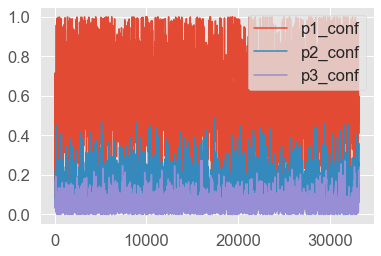

In [105]:
plt.style.use("ggplot")
abt[['p1_conf','p2_conf','p3_conf']].plot()

Text(0, 0.5, 'Count %')

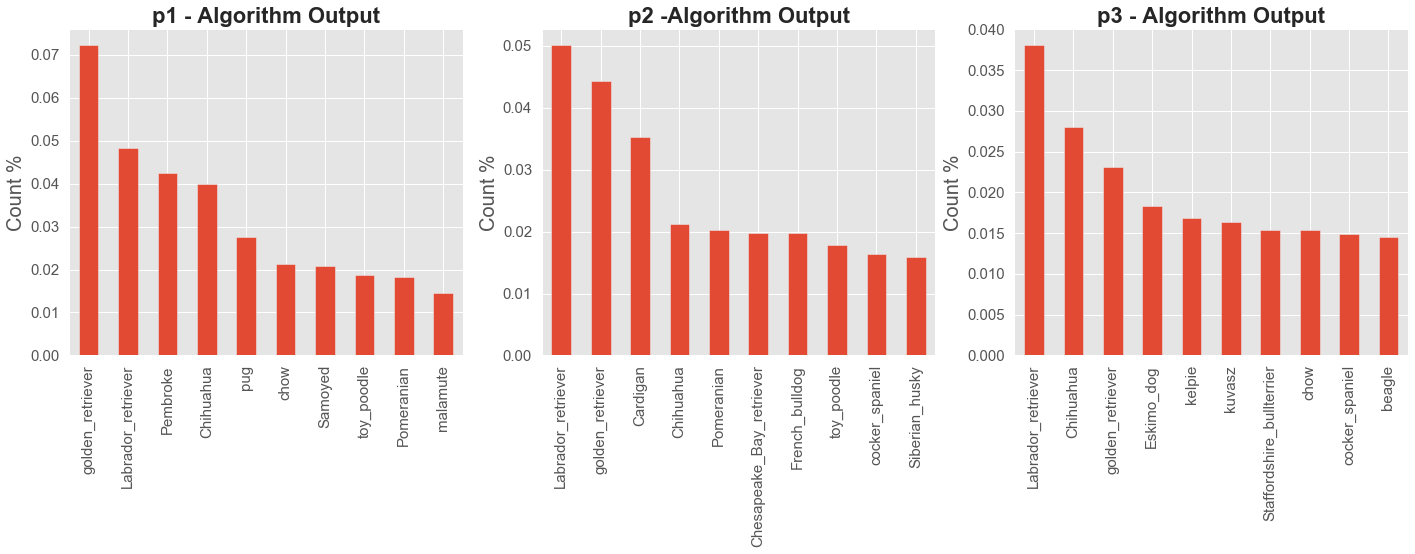

In [106]:
plt.subplot(131)

merge_data1['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p1 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
merge_data1['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p2 -Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
merge_data1['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p3 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

In [107]:
abt.to_csv('twitter_archive_master.csv', index=False)

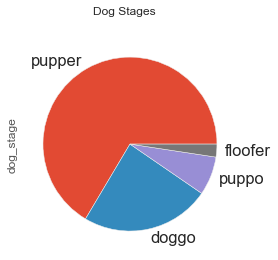

In [108]:
abt[abt.dog_stage!='None'].dog_stage.value_counts().plot.pie(subplots=True, title="Dog Stages");

## Conclusion:

 - Data wrangling is process to clean the dataand to provide structure and enhancing code readability 
 - Scrape data (rating ,urls, image data , retweet and favorite_counts) from various sources  in different format (csv,json,jpg)
 - Data wrangling issues:quality issues and tidiness issues  
 - Fixing timestamp(string) datatype,remove unnecessary html tags ,missing data .
 - Melt() is used to combine the data.
 - Join melted DataFrames into one table using the merge() function.
 - To reduce this result into an analytical base table using reduce function().